<a href="https://colab.research.google.com/github/Saber0275/Data-Augmentation-to-handle-overfitting-on-GPU-by-Tensorflow-using-CNN/blob/main/Data_augmentation%2C_Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
<div class="alert alert-info">
<h1><center><font color=red> Data Augmentation To Address Overfitting In Flower Classification CNN <font></center></h1>

- By Saber Saharkhiz
</div>

- In this notebook I will build a CNN to classify flower images. I will also see how my model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

In [ ]:
# To see if it is available on GPU:

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #for image visualization by pillow python
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:3]  #glob→ all the images (3 of them)

[PosixPath('datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg'),
 PosixPath('datasets/flower_photos/roses/172311368_49412f881b.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
dandelion = list(data_dir.glob('dandelion/*'))
dandelion[:5]

[PosixPath('datasets/flower_photos/dandelion/7062171343_db61c92737_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8980145452_efbd6e3b04.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4528742654_99d233223b_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5607669502_ccd2a76668_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4633323785_20676ff914_m.jpg')]

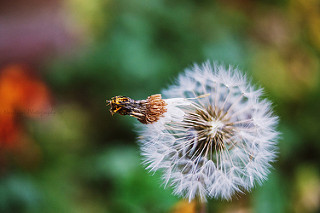

In [ ]:
PIL.Image.open(str(dandelion[0]))

# Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [ ]:
flowers_images_dict['tulips'][:5]

[PosixPath('datasets/flower_photos/tulips/17844723633_da85357fe3.jpg'),
 PosixPath('datasets/flower_photos/tulips/15090146325_b7e1249e60.jpg'),
 PosixPath('datasets/flower_photos/tulips/6267021825_a8316e0dcc_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/11746367_d23a35b085_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13176521023_4d7cc74856_m.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape
# (x,y, RGB)

(213, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [ ]:
#resize all images by for loop:

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

**Train test split**

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
#Normalization:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),  #16 filters by size of 3 (3 by 3)
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15) 

Epoch 1/15
86/86 [==============================] - 12s 23ms/step - loss: 1.5109 - accuracy: 0.3496
Epoch 2/15
86/86 [==============================] - 2s 23ms/step - loss: 1.1578 - accuracy: 0.5200
Epoch 3/15
86/86 [==============================] - 2s 23ms/step - loss: 1.0098 - accuracy: 0.6003
Epoch 4/15
86/86 [==============================] - 2s 23ms/step - loss: 0.8433 - accuracy: 0.6672
Epoch 5/15
86/86 [==============================] - 2s 23ms/step - loss: 0.6609 - accuracy: 0.7555
Epoch 6/15
86/86 [==============================] - 2s 23ms/step - loss: 0.4845 - accuracy: 0.8230
Epoch 7/15
86/86 [==============================] - 2s 23ms/step - loss: 0.3081 - accuracy: 0.8964
Epoch 8/15
86/86 [==============================] - 2s 24ms/step - loss: 0.2329 - accuracy: 0.9241
Epoch 9/15
86/86 [==============================] - 2s 23ms/step - loss: 0.1572 - accuracy: 0.9539
Epoch 10/15
86/86 [==============================] - 2s 23ms/step - loss: 0.1067 - accuracy: 0.9731
Epoch 11

In [ ]:
#validation on test:
model.evaluate(X_test_scaled,y_test)

# so there is overfitting!!! → how to handle it? by data augmentation

29/29 [==============================] - 1s 19ms/step - loss: 2.8907 - accuracy: 0.5904


[2.890702486038208, 0.5904139280319214]

In [ ]:
#Lets predict and see some of the results: 

predictions = model.predict(X_test_scaled)
predictions

#It shows as tensor (array) ► we have to use argmax from numpy to see the result:

array([[  0.8772794 ,  -6.2913394 ,  -5.8427634 ,   0.28751534,
          6.6574574 ],
       [ -3.6238272 ,  -6.4018655 ,   1.6309813 ,   2.823531  ,
          0.76610017],
       [  3.2984207 ,  -2.7160153 ,  -4.1498947 ,  -2.3310046 ,
          5.1379967 ],
       ...,
       [ -0.8212839 ,  -1.5887234 ,  -1.0275842 ,   2.6646395 ,
         -1.0663244 ],
       [  1.1609435 ,  -1.850364  ,  -3.5553446 ,  -3.806565  ,
          6.164756  ],
       [-12.478969  , -23.632872  ,   4.936377  ,  11.575186  ,
          3.5324092 ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[6])

In [ ]:
np.argmax(score)
#Our prediction says that the 6th prediction is rose

0

In [ ]:
y_test[6]
#It says it is tulips!

4

## *** Data Augmentation***

In [ ]:
#Improving Test Accuracy Using Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

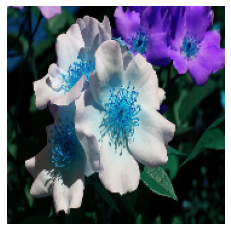

In [ ]:
#Original Image:

plt.axis('off')
plt.imshow(X[2])

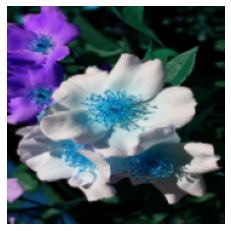

In [ ]:
#After Augmentation:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype("uint8"))

# **Train the model using data augmentation and a drop out layer**

In [ ]:
num_classes = 5 #5 different types of flowers

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.2),  #20% dropout
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 4s 25ms/step - loss: 1.4390 - accuracy: 0.3612
Epoch 2/30
86/86 [==============================] - 2s 24ms/step - loss: 1.1531 - accuracy: 0.5153
Epoch 3/30
86/86 [==============================] - 2s 24ms/step - loss: 1.0436 - accuracy: 0.5894
Epoch 4/30
86/86 [==============================] - 2s 24ms/step - loss: 0.9750 - accuracy: 0.6119
Epoch 5/30
86/86 [==============================] - 2s 25ms/step - loss: 0.9336 - accuracy: 0.6272
Epoch 6/30
86/86 [==============================] - 2s 25ms/step - loss: 0.8884 - accuracy: 0.6483
Epoch 7/30
86/86 [==============================] - 2s 24ms/step - loss: 0.8438 - accuracy: 0.6661
Epoch 8/30
86/86 [==============================] - 2s 24ms/step - loss: 0.8222 - accuracy: 0.6795
Epoch 9/30
86/86 [==============================] - 2s 24ms/step - loss: 0.7905 - accuracy: 0.6944
Epoch 10/30
86/86 [==============================] - 2s 24ms/step - loss: 0.7748 - accuracy: 0.7046
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 0.7647 - accuracy: 0.7048


[0.7647321820259094, 0.7047930359840393]

**We can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 70%**